# <u>Van's Notes</u>

## Using Pandas/Matplotlib/Numpy/etc. Libraries

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Hello world


PearsonRResult(statistic=-0.10936924995064941, pvalue=0.18276521527137002)
Slope: -0.057268233797164836
Intercept: 3.3886373794881


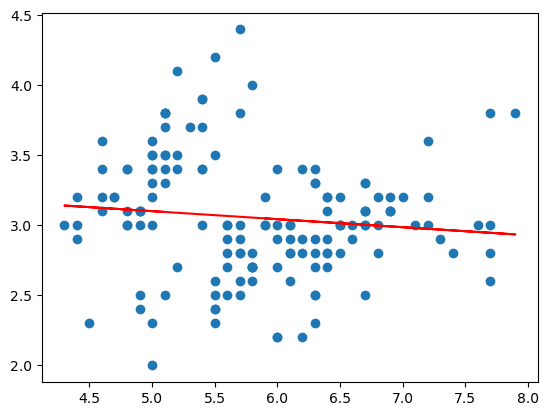

In [3]:
data = pd.read_csv("data/Iris.csv", sep=",") # Reads in the iris data set
x1 = data["SepalLengthCm"]
y1 = data["SepalWidthCm"]
plt.scatter(x1, y1)
# plt.show() is needed if you're not using something like Jupyter or Colab

#COPY/PASTED STUFF
# PearsonR statistic gives you a correlation reference. The closer to 1 means the closer to correlation (-1 is negative correlation)
# pvalue tell if you can reject/accept a null hypothesis. A pvalue closer to 0 means it's significant, so you can trust the correlation.
pearson = stats.pearsonr(x1, y1)
print(pearson)

# Get statistics using scipy.stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
plt.plot(x1, (slope * x1) + intercept, "r") # Visualizing a line of fit
# You can use the values for y=mx+b to make predictions too
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# No correlations found b/w sepal width and sepal length regarding this data. Now you can dive further into species?

PearsonRResult(statistic=0.9627570970509661, pvalue=5.7766609884951665e-86)
Slope: 0.41641913228540123
Intercept: -0.3665140452167277


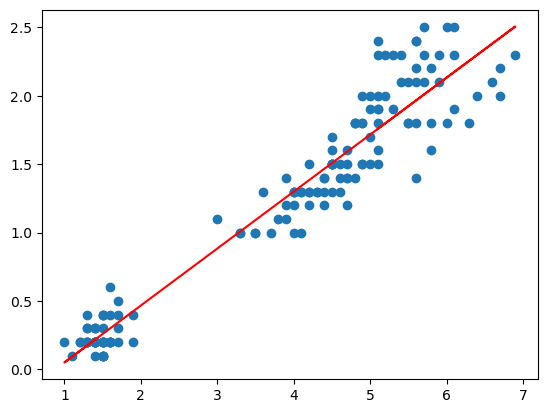

In [4]:
x = data["PetalLengthCm"]
y = data["PetalWidthCm"]
plt.scatter(x, y)
# Results might be indication of species. Also stuff like smaller length smaller width correlations.

# PearsonR statistic gives you a correlation reference. The closer to 1 means the closer to correlation (-1 is negative correlation)
# pvalue tell if you can reject/accept a null hypothesis. A pvalue closer to 0 means it's significant, so you can trust the correlation.
pearson = stats.pearsonr(x, y)
print(pearson)

# Get statistics using scipy.stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, (slope * x) + intercept, "r") # Visualizing a line of fit
# You can use the values for y=mx+b to make predictions too
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

### Plotting by species

PearsonRResult(statistic=0.7467803732639268, pvalue=4.751986580148989e-10)
PearsonRResult(statistic=0.5259107172828246, pvalue=8.771860011973847e-05)
PearsonRResult(statistic=0.45722781639411303, pvalue=0.0008434624723708778)


Text(0, 0.5, 'Sepal Width (cm)')

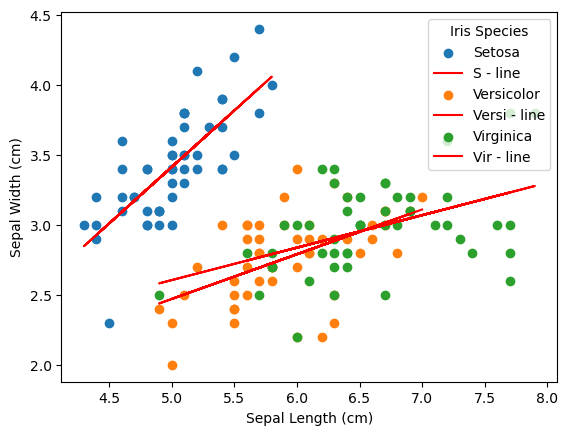

In [5]:
groups = data.groupby("Species")

# Loop through each species and get individual data
for name, group_data in groups:
    #print(name) # gives all the distinct names
    #print(group_data) # gives all data associated w/ the group itself
    x2 = group_data.SepalLengthCm
    y2 = group_data.SepalWidthCm
    plt.scatter(x2, y2)

    # Get statistics using scipy.stats 
    pearson = stats.pearsonr(x2, y2)
    print(pearson)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
    plt.plot(x2, (slope * x2) + intercept, "r") # Visualizing a line of fit

# Adding features
plt.legend(["Setosa", "S - line", "Versicolor", "Versi - line", "Virginica", "Vir - line"], title="Iris Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")


* Setosa has decent positive correlation of sepal length/width. Same with the other two species, though perhaps not as much.
* After grouping by species, there is now data that shows for correlation

## AL-2: Subplots and Iris Dataset

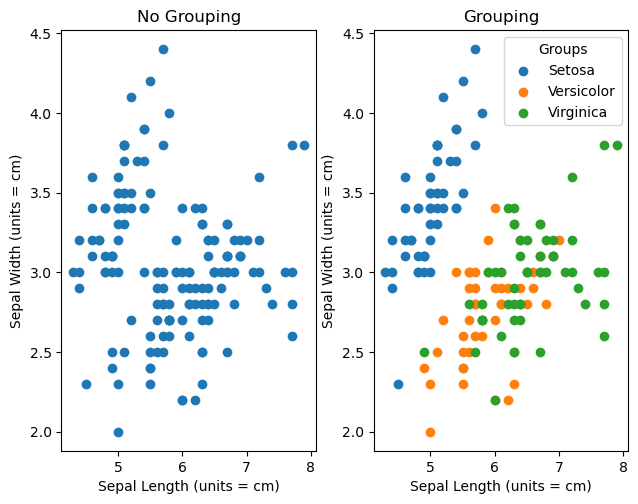

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

#ax1 - No Grouping
ax1.set_title("No Grouping")
ax1.set_xlabel("Sepal Length (units = cm)")
ax1.set_ylabel("Sepal Width (units = cm)")
ax1.scatter(x1, y1)

#ax2 - Grouping
for name, group_data in groups:
    x2 = group_data.SepalLengthCm
    y2 = group_data.SepalWidthCm
    ax2.set_title("Grouping")
    ax2.set_xlabel("Sepal Length (units = cm)")
    ax2.set_ylabel("Sepal Width (units = cm)")
    ax2.scatter(x2, y2)
    ax2.legend(["Setosa", "Versicolor", "Virginica"], title="Groups")


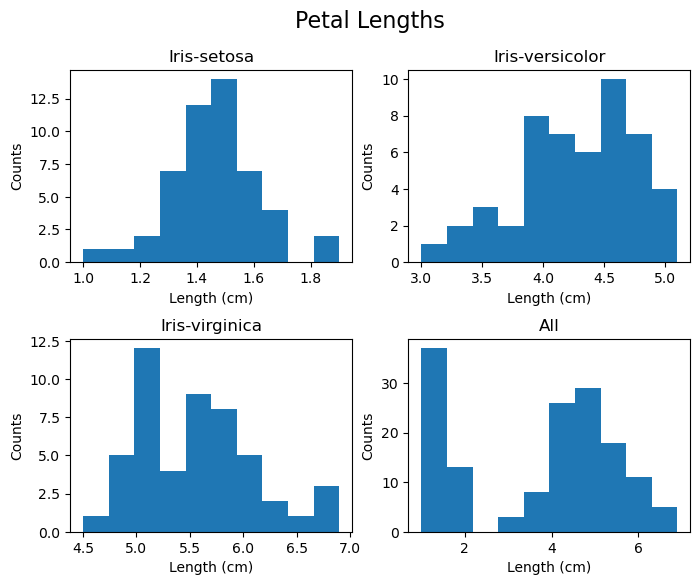

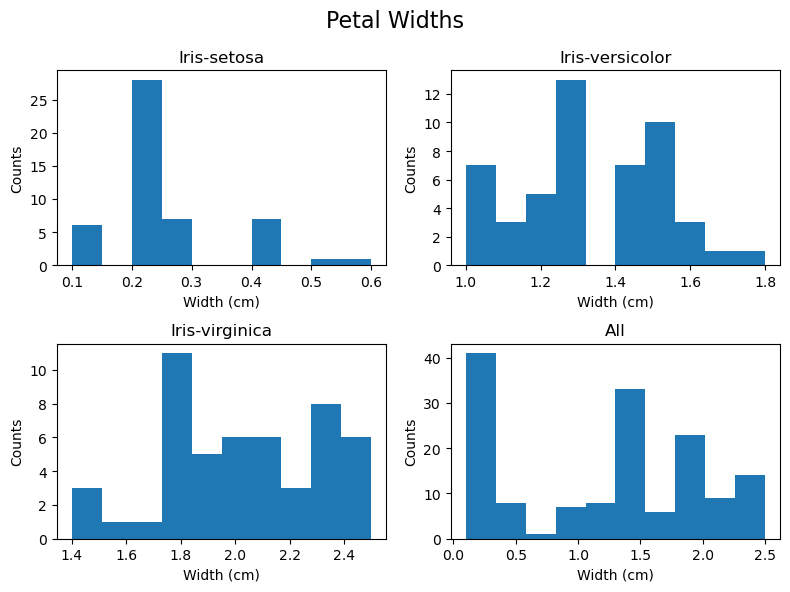

In [7]:
### Creating Histograms

# Making TWO histogram subplots (2x2), one for leaf-width and one for leaf-length
fig_length, axs_length = plt.subplots(2, 2, figsize=(8, 6), gridspec_kw={'hspace': 0.4}) # https://stackoverflow.com/questions/31484273/spacing-between-some-subplots-but-not-all
fig_width, axs_width = plt.subplots(2, 2, figsize=(8, 6))

for name, group_data in groups:
    lengths = group_data.PetalLengthCm
    widths = group_data.PetalWidthCm

    # Get axes position for each flower subplot
    if name == 'Iris-setosa':
        ax_length = axs_length[0, 0]
        ax_width = axs_width[0, 0]
    elif name == 'Iris-versicolor':
        ax_length = axs_length[0, 1]
        ax_width = axs_width[0, 1]
    elif name == 'Iris-virginica':
        ax_length = axs_length[1, 0]
        ax_width = axs_width[1, 0]
    else:
        continue

    # Plotting length/width histograms for each flower
    ax_length.hist(lengths)
    ax_length.set_title(name)
    ax_length.set_xlabel("Length (cm)")
    ax_length.set_ylabel("Counts")

    ax_width.hist(widths)
    ax_width.set_title(name)
    ax_width.set_xlabel("Width (cm)")
    ax_width.set_ylabel("Counts")

# Add stuff for subplot [1, 1] (all flowers combined)
axs_length[1, 1].hist(data["PetalLengthCm"])
axs_length[1, 1].set_title("All")
axs_length[1, 1].set_xlabel("Length (cm)")
axs_length[1, 1].set_ylabel("Counts")

axs_width[1, 1].hist(data["PetalWidthCm"])
axs_width[1, 1].set_title("All")
axs_width[1, 1].set_xlabel("Width (cm)")
axs_width[1, 1].set_ylabel("Counts")

# Other aesthetics
fig_length.suptitle("Petal Lengths", fontsize=16)
fig_width.suptitle("Petal Widths", fontsize=16)
plt.tight_layout()


In [11]:
### Stats
# Computing statistics for each group
for name, group_data in groups:
    lengths = group_data.PetalLengthCm
    widths = group_data.PetalWidthCm
    
    # Normality test for length and width
    length_stat, length_p_value = stats.normaltest(lengths)
    width_stat, width_p_value = stats.normaltest(widths)
    
    # Other stats
    length_variance = np.var(lengths)
    width_variance = np.var(widths)
    mean_length = np.mean(lengths)
    median_length = np.median(lengths)
    std_dev_length = np.std(lengths)
    mean_width = np.mean(widths)
    median_width = np.median(widths)
    std_dev_width = np.std(widths)

    # Printing all stats
    print(f"\nStatistics for {name}:")
    print(f"Length normality test statistic: {length_stat}, p-value: {length_p_value}")
    print(f"Width normality test statistic: {width_stat}, p-value: {width_p_value}")
    print(f"Length variance: {length_variance}")
    print(f"Width variance: {width_variance}")
    print(f"Mean length: {mean_length}")
    print(f"Median length: {median_length}")
    print(f"Standard deviation of length: {std_dev_length}")
    print(f"Mean width: {mean_width}")
    print(f"Median width: {median_width}")
    print(f"Standard deviation of width: {std_dev_width}")



Statistics for Iris-setosa:
Length normality test statistic: 2.2042103605384895, p-value: 0.33217106714951616
Width normality test statistic: 13.777761971344315, p-value: 0.0010190535387181354
Length variance: 0.029504000000000002
Width variance: 0.011264000000000003
Mean length: 1.464
Median length: 1.5
Standard deviation of length: 0.17176728442867112
Mean width: 0.244
Median width: 0.2
Standard deviation of width: 0.10613199329137281

Statistics for Iris-versicolor:
Length normality test statistic: 3.3182862415011867, p-value: 0.1903019760720321
Width normality test statistic: 0.32741606910241755, p-value: 0.8489898614040613
Length variance: 0.21640000000000004
Width variance: 0.038324
Mean length: 4.26
Median length: 4.35
Standard deviation of length: 0.4651881339845203
Mean width: 1.3259999999999998
Median width: 1.3
Standard deviation of width: 0.19576516544063705

Statistics for Iris-virginica:
Length normality test statistic: 2.6991800572037943, p-value: 0.2593465635270746
Wid

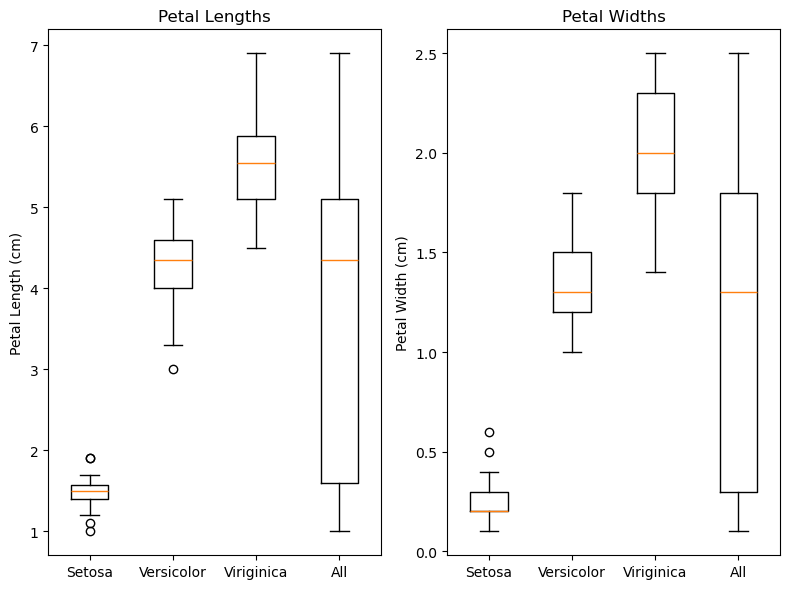

In [23]:
### Creating Box-plot
fig, (length_boxplot, width_boxplot) = plt.subplots(1, 2, figsize=(8, 6))

# Collecting the box plot data
length_data = []
width_data = []
for name, group_data in groups:
    length_data.append(group_data['PetalLengthCm'].values)
    width_data.append(group_data['PetalWidthCm'].values)

# Adding data for all the flower lengths/widths
length_data.append(data['PetalLengthCm'].values)
width_data.append(data['PetalWidthCm'].values)

# Creating box plot for leaf lengths
length_boxplot.boxplot(length_data, labels=['Setosa', 'Versicolor', 'Viriginica'] + ['All'])
length_boxplot.set_ylabel('Petal Length (cm)')
length_boxplot.set_title('Petal Lengths')

# Creating box plot for leaf widths
width_boxplot.boxplot(width_data, labels=['Setosa', 'Versicolor', 'Viriginica'] + ['All'])
width_boxplot.set_ylabel('Petal Width (cm)')
width_boxplot.set_title('Petal Widths')

plt.tight_layout()